<a href="https://www.kaggle.com/code/ikram98ai/classification-with-an-academic-success?scriptVersionId=191568251" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance

import os, warnings, pickle
warnings.filterwarnings('ignore')

## **EDA**

In [2]:
synthetic_df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv').drop('id',axis=1)
synthetic_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,5,17,1,9085,1,1,138.0,1,37,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,1,1,3,9070,1,1,136.0,1,38,37,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [3]:
original_df = pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success-ori/data.csv',sep=';')
original_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
original_df.columns == synthetic_df.columns

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [5]:
original_df.columns = synthetic_df.columns

In [6]:
df = pd.concat((synthetic_df,original_df),axis=0,ignore_index=True).reset_index().drop('index',axis=1)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80937,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
80938,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
80939,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
80940,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,80942.0,1.115577,0.452426,1.00,1.000000,1.000000,1.000000,6.000000
Application mode,80942.0,16.197326,16.737628,1.00,1.000000,17.000000,39.000000,57.000000
Application order,80942.0,1.648971,1.234530,0.00,1.000000,1.000000,2.000000,9.000000
Course,80942.0,8993.380668,1818.900599,33.00,9119.000000,9254.000000,9670.000000,9991.000000
Daytime/evening attendance,80942.0,0.913975,0.280402,0.00,1.000000,1.000000,1.000000,1.000000
Previous qualification,80942.0,3.708989,8.720782,1.00,1.000000,1.000000,1.000000,43.000000
Previous qualification (grade),80942.0,132.391585,11.126395,95.00,125.000000,133.100000,140.000000,190.000000
Nacionality,80942.0,1.261941,3.675890,1.00,1.000000,1.000000,1.000000,109.000000
Mother's qualification,80942.0,19.822564,15.410691,1.00,1.000000,19.000000,37.000000,44.000000
Father's qualification,80942.0,23.362235,14.946722,1.00,3.000000,19.000000,37.000000,44.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80942 entries, 0 to 80941
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  80942 non-null  int64  
 1   Application mode                                80942 non-null  int64  
 2   Application order                               80942 non-null  int64  
 3   Course                                          80942 non-null  int64  
 4   Daytime/evening attendance                      80942 non-null  int64  
 5   Previous qualification                          80942 non-null  int64  
 6   Previous qualification (grade)                  80942 non-null  float64
 7   Nacionality                                     80942 non-null  int64  
 8   Mother's qualification                          80942 non-null  int64  
 9   Father's qualification                 

In [9]:
df.duplicated().sum()

0

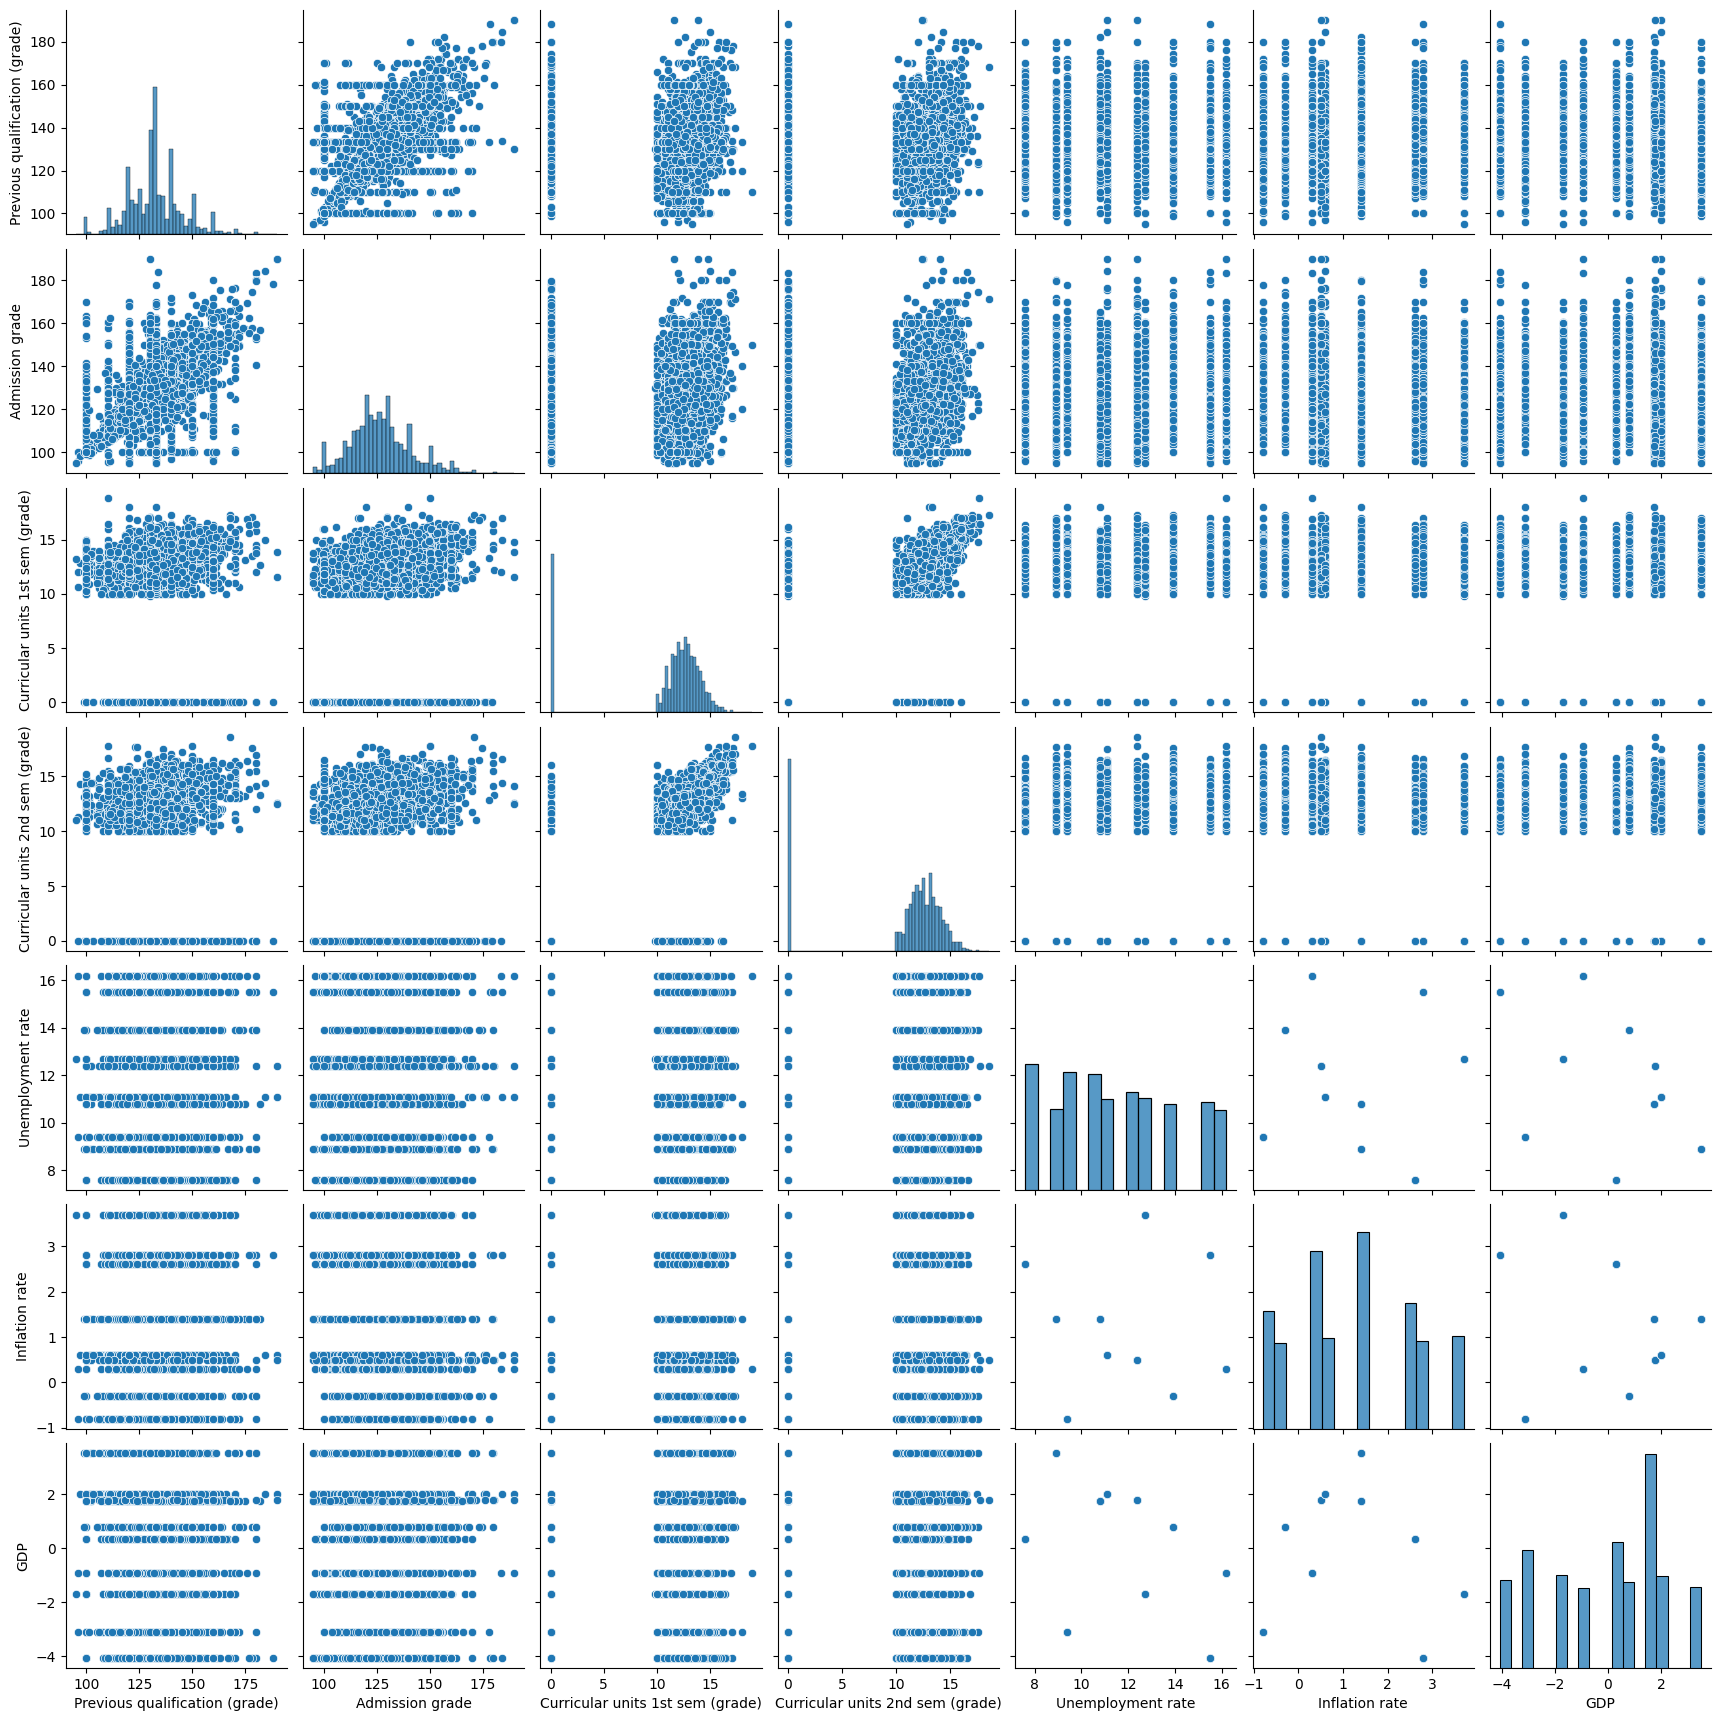

In [10]:
sns.pairplot(original_df.select_dtypes(float))

In [11]:
df.Target.value_counts(normalize=True).round(3)

Target
Graduate    0.476
Dropout     0.330
Enrolled    0.194
Name: proportion, dtype: float64

## **Prepearing Data**

In [12]:
X = df.drop('Target',axis=1)
y = df['Target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify=y, random_state=42)


In [14]:
from sklearn.model_selection import PredefinedSplit
X_tr, X_val, y_tr, y_val = train_test_split( X_train, y_train, test_size=0.33, stratify=y_train, random_state=42)
split_index = [0 if x in X_val.index else -1 for x in X_train.index ]
custom_split= PredefinedSplit(split_index)

## **Decision Trees**

In [15]:
scoring = ['recall','precision','f1','accuracy']

model  = DecisionTreeClassifier()
params = {
    'max_depth':[6,8,10],
    'min_samples_leaf':[14,16,18]
}

In [16]:
%%time
cv = GridSearchCV(model,params,scoring=scoring,cv=custom_split,refit='accuracy',verbose=True)
cv.fit(X_train,y_train)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
CPU times: user 5.69 s, sys: 27.8 ms, total: 5.72 s
Wall time: 5.73 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ..., -1, -1])),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [14, 16, 18]},
             refit='accuracy',
             scoring=['recall', 'precision', 'f1', 'accuracy'], verbose=True)

In [17]:
cv.best_score_

0.8157791808683019

In [18]:
cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 16}

In [19]:
def evaluate(actuals,preds):
    print('Accuracy:',accuracy_score(actuals,preds))
    print('Recall:',recall_score(actuals,preds,average='weighted'))
    print('Precision:',precision_score(actuals,preds,average='weighted'))
    print('F1 score:',f1_score(actuals,preds,average='weighted'))
    print()
    cm = confusion_matrix(actuals,preds,labels=df.Target.unique())
    ConfusionMatrixDisplay(cm,display_labels=df.Target.unique()).plot()

    

In [20]:
preds = cv.best_estimator_.predict(X_test)

Accuracy: 0.8114634420276291
Recall: 0.8114634420276291
Precision: 0.8118529918225112
F1 score: 0.810036568583178



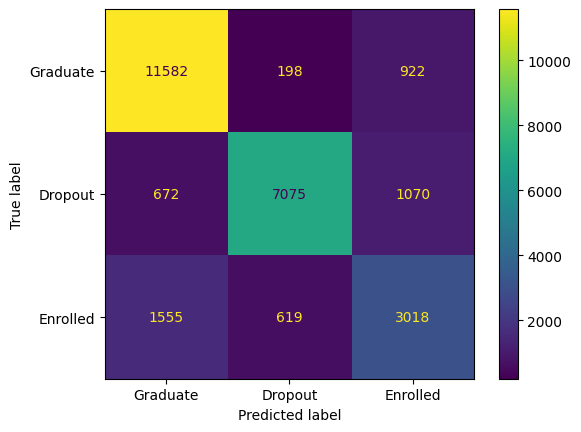

In [21]:
evaluate(y_test,preds)

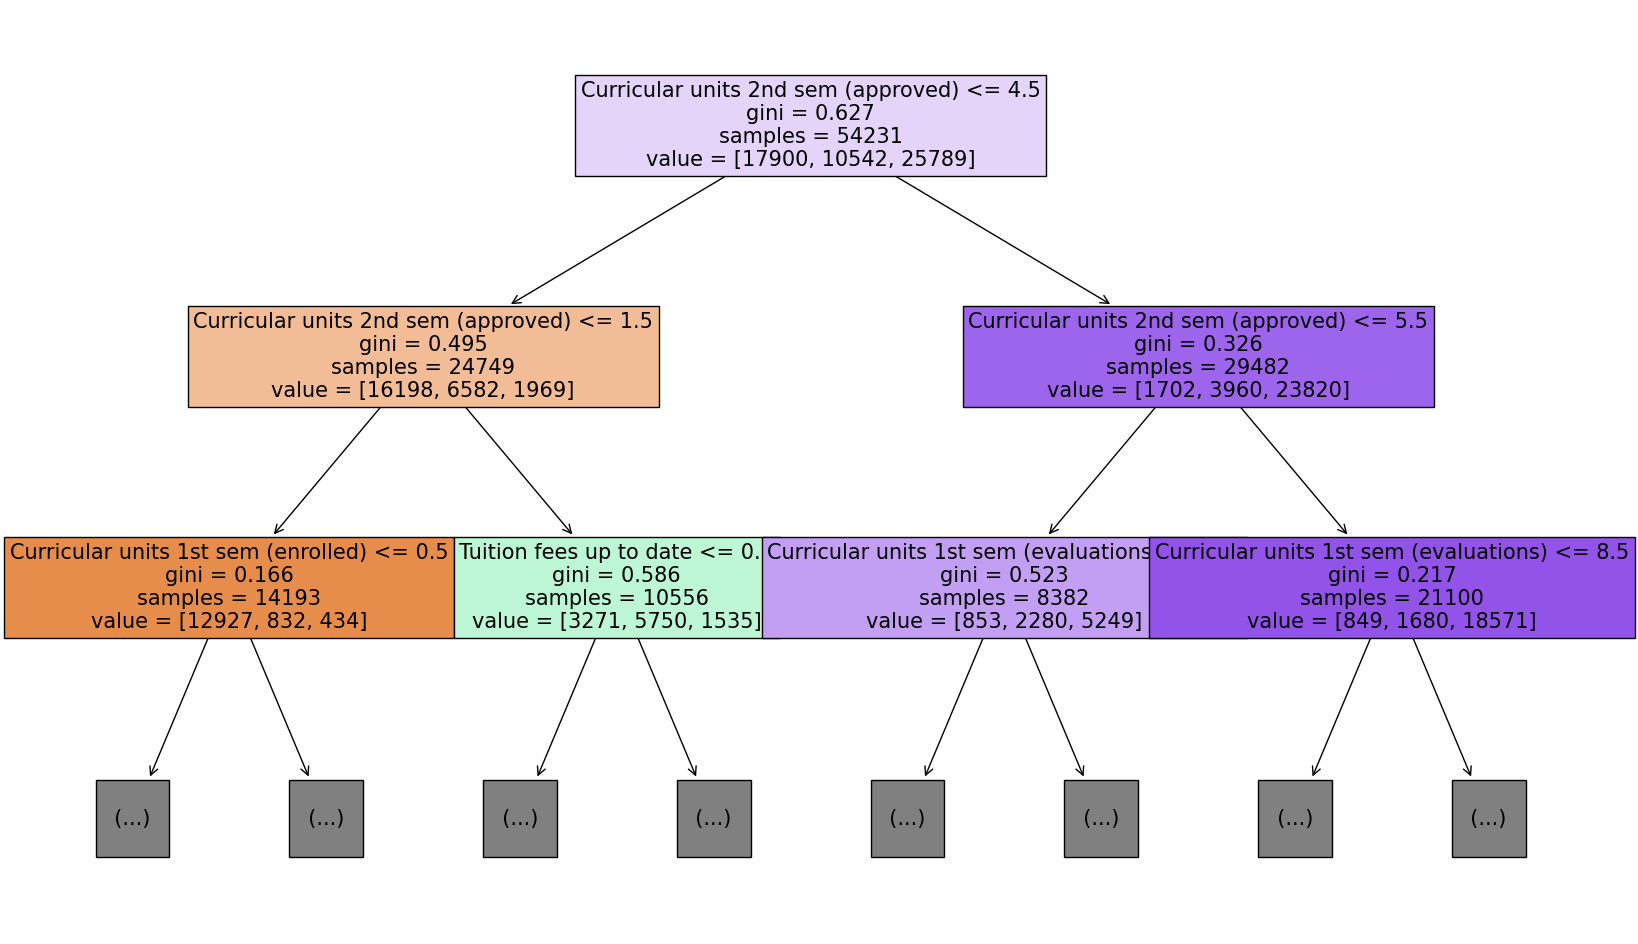

In [22]:
plt.figure(figsize=(20,12))
plot_tree(cv.best_estimator_,feature_names=X.columns,max_depth=2,filled=True,fontsize=15)
plt.show()

## **Neural Network** 

In [23]:
from fastai.tabular.all import *

### **Creating DataLoader**

In [24]:
len(set(X['Age at enrollment']))

46

In [25]:
cat_col_names,cont_col_names= [], []
for col in X.columns:
    if len(set(X[col]))<6:
        cat_col_names.append(col)
    else:
        cont_col_names.append(col)

In [26]:
dls = TabularDataLoaders.from_df(df, y_names="Target", 
                                 procs=[Categorify,Normalize], 
                                 cat_names=cat_col_names, 
                                 cont_names=cont_col_names, 
                                 y_block=CategoryBlock())

In [27]:
learn = tabular_learner(dls, metrics=accuracy)

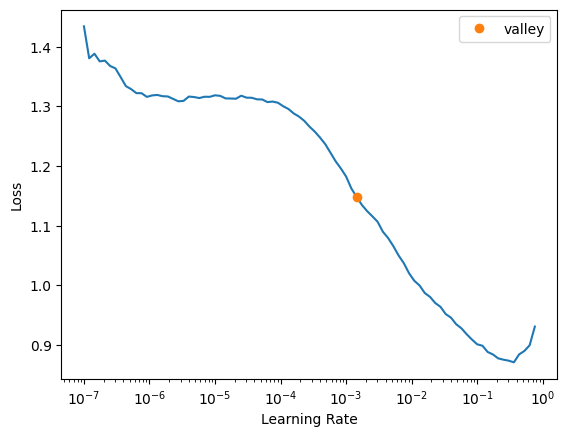

In [28]:
lr = learn.lr_find().valley

In [29]:
learn.fit_one_cycle(3,lr_max=lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.476563,0.486948,0.810662,00:12
1,0.492504,0.476231,0.815110,00:12
2,0.483175,0.471169,0.818199,00:11


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

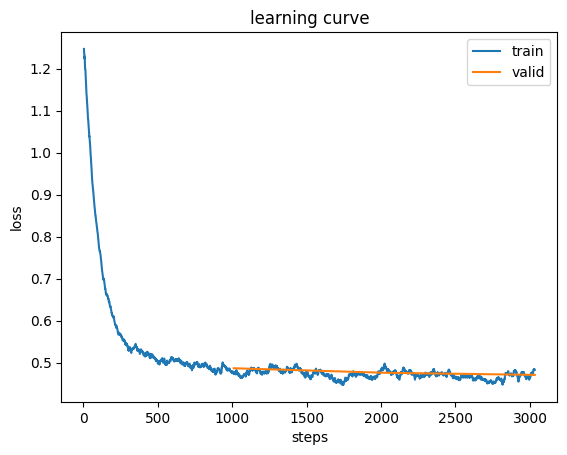

In [30]:
learn.recorder.plot_loss()


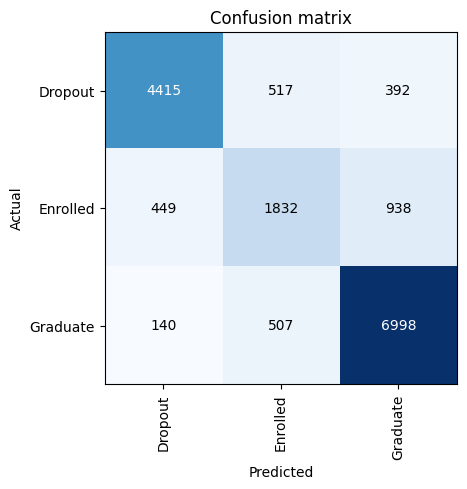

In [31]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

In [32]:
interpret.print_classification_report()


              precision    recall  f1-score   support

     Dropout       0.88      0.83      0.85      5324
    Enrolled       0.64      0.57      0.60      3219
    Graduate       0.84      0.92      0.88      7645

    accuracy                           0.82     16188
   macro avg       0.79      0.77      0.78     16188
weighted avg       0.81      0.82      0.81     16188



## **Predicting Test Data**

In [33]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv').drop('id',axis=1)

In [34]:
test_dl=learn.dls.test_dl(test_df)

In [35]:
preds,_ = learn.get_preds(dl=test_dl)

In [36]:
pred_target = [ learn.dls.vocab[int(i)] for i in preds.argmax(dim=1)]

## **Submiting Result**

In [37]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')
submission.Target = pred_target
submission.head(3)

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate


In [38]:
submission.to_csv('submission.csv', index=False)